# Step 1: Importing Necessary Libraries¶
**This is the step where we import all the libraries we need for our work**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

# Step 2: Loading The Dataset¶
**This is the step where we load our dataset using pandas, in this case we will load a dataset called [School Student Daily Attendance](https://www.kaggle.com/datasets/sahirmaharajj/school-student-daily-attendance)**

In [2]:
#filepath of the dataset
filepath = '/kaggle/input/school-student-daily-attendance/2018-2019_Daily_Attendance_20240429.csv'

#load the spotify dataset
df = pd.read_csv(filepath)

# Step 3: EDA and Data Cleaning
**This is the step where we analyze the data to know if there are problems in it and solving these problems**

In [3]:
#first 5 rows of the data
df.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0


**Date column needs to be handled**

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [5]:
df

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,2018-09-05,172,19,153,0
1,01M015,2018-09-06,171,17,154,0
2,01M015,2018-09-07,172,14,158,0
3,01M015,2018-09-12,173,7,166,0
4,01M015,2018-09-13,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,2019-06-20,230,46,136,48
277149,79X695,2019-06-21,226,53,128,45
277150,79X695,2019-06-24,226,42,130,54
277151,79X695,2019-06-25,226,56,127,43


**Done✅**

In [6]:
#shape of the data
df.shape

(277153, 6)

In [7]:
#check if there are any duplicated rows
df.duplicated().sum()

0

In [8]:
#numbers of nulls in each column in the dataset
df.isnull().sum()

School DBN    0
Date          0
Enrolled      0
Absent        0
Present       0
Released      0
dtype: int64

In [9]:
#data types of the columns
df.dtypes

School DBN            object
Date          datetime64[ns]
Enrolled               int64
Absent                 int64
Present                int64
Released               int64
dtype: object

In [10]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   School DBN  277153 non-null  object        
 1   Date        277153 non-null  datetime64[ns]
 2   Enrolled    277153 non-null  int64         
 3   Absent      277153 non-null  int64         
 4   Present     277153 non-null  int64         
 5   Released    277153 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 12.7+ MB


In [11]:
#statistical measures about the data
df.describe()

,Date,Enrolled,Absent,Present,Released
count,277153,277153.0,277153.0,277153.0,277153.0
mean,2019-01-28 12:18:24.343088128,597.0,50.5,544.5,2.0
min,2018-09-04 00:00:00,1.0,0.0,1.0,0.0
25%,2018-11-13 00:00:00,329.0,23.0,291.0,0.0
50%,2019-01-29 00:00:00,476.0,38.0,430.0,0.0
75%,2019-04-10 00:00:00,684.0,59.0,640.0,0.0
max,2019-06-26 00:00:00,5955.0,2151.0,5847.0,5904.0
std,NaN,482.9,54.3,453.0,35.1


# Step 4: Data Visualizations
**This is the step we will create Data Visualizations to have better Image and gain insights from spotify data, this step is part of EDA**

In [12]:
df

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,2018-09-05,172,19,153,0
1,01M015,2018-09-06,171,17,154,0
2,01M015,2018-09-07,172,14,158,0
3,01M015,2018-09-12,173,7,166,0
4,01M015,2018-09-13,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,2019-06-20,230,46,136,48
277149,79X695,2019-06-21,226,53,128,45
277150,79X695,2019-06-24,226,42,130,54
277151,79X695,2019-06-25,226,56,127,43


## Top 10 Maximum Number of Enrolled Students In One Day For Each School⬆️

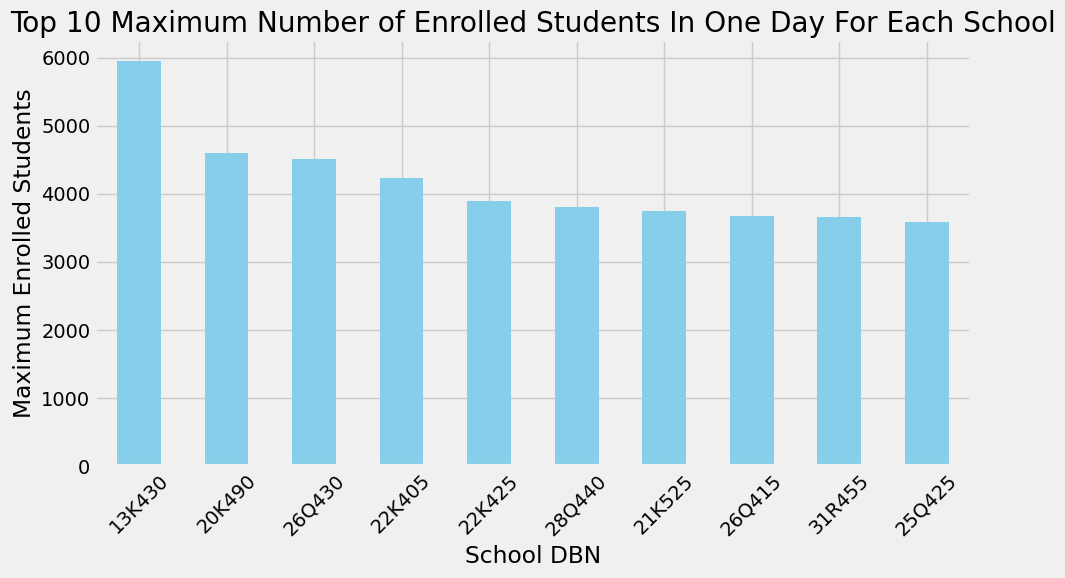

In [13]:
#group by 'School DBN' and find the maximum enrollment for each school
max_enrollment_by_school = df.groupby('School DBN')['Enrolled'].max()

#sort the Series by maximum enrollment in descending order
max_enrollment_by_school_sorted = max_enrollment_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_enrollment_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Enrolled Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Enrolled Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Unfortunately the data we have contains School DBN column not the name of schools😓**

## Top 10 Maximum Number of Absent Students In One Day For Each School⬆️

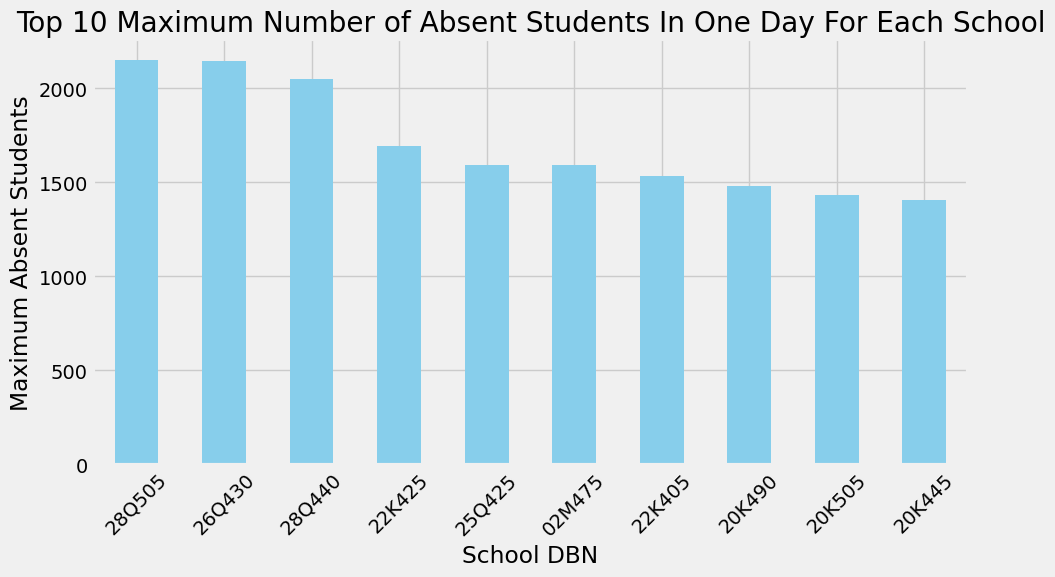

In [14]:
#group by 'School DBN' and find the maximum Absence for each school
max_absence_by_school = df.groupby('School DBN')['Absent'].max()

#sort the Series by maximum enrollment in descending order
max_absence_by_school_sorted = max_absence_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_absence_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Absent Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Absent Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Top 10 Maximum Number of Present Students In One Day For Each School⬆️

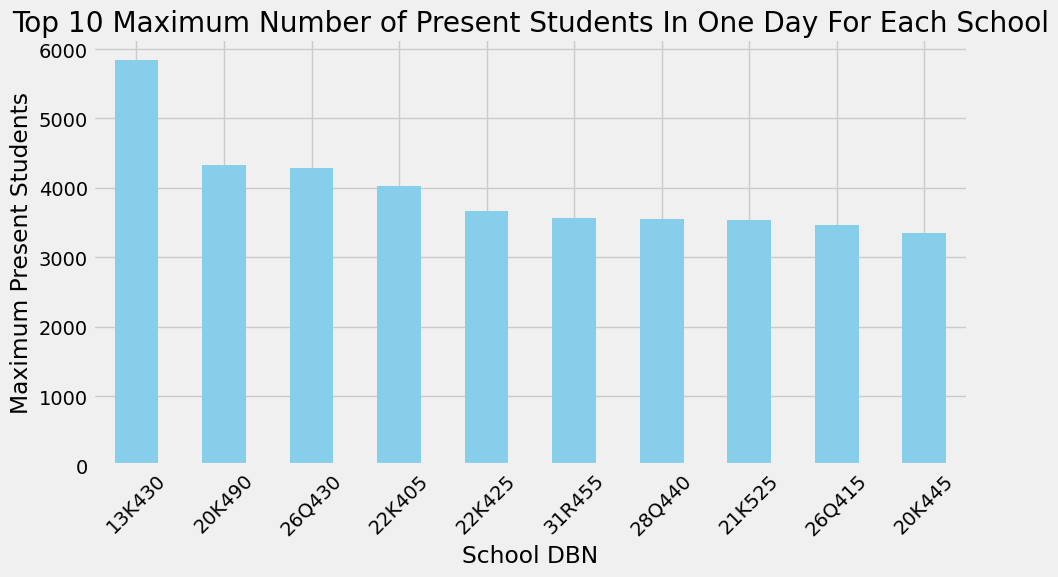

In [15]:
#group by 'School DBN' and find the maximum present for each school
max_presence_by_school = df.groupby('School DBN')['Present'].max()

#sort the Series by maximum presence in descending order
max_presence_by_school_sorted = max_presence_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_presence_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Present Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Present Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Top 10 Maximum Number of Released Students In One Day For Each School⬆️

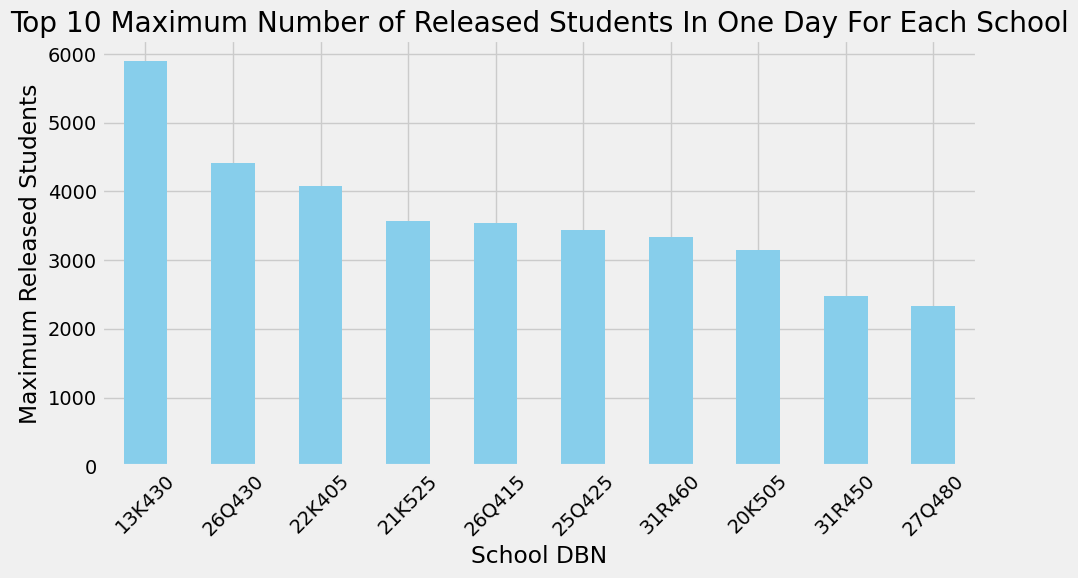

In [16]:
#group by 'School DBN' and find the maximum release for each school
max_release_by_school = df.groupby('School DBN')['Released'].max()

#sort the Series by maximum release in descending order
max_release_by_school_sorted = max_release_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_release_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Released Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Released Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()